In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
def correlacion_pearson(data_frame, columna1, columna2): 
    """Retorna el indice de correlacion de Pearson"""
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Resultados de los Experimentos con Jambo-tubos
A continuación en en el presente cuaderno se explora todo lo relativo a la experimentación computacional.
- En este archivo se lee el output de los experimentos y grafican los resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **densidad-alta**: Son instancias con n = 1..200 y con densidad alta, es decir, los números de S son altos en comparación con W.
2. **densidad-baja**: Son instancias con n = 1..200 y con densidad baja, o sea, se necesitan muchos números de S para sumar W.
3. **mejor-caso-BT**: Instancias de mejor caso para el algoritmo de BT con podas.
4. **mal-caso-BT**: Instancias de peor caso para el algoritmo de BT con podas.
5. **peor-caso-BT-O**: Instancias de peor caso para el algoritmo de BT con podas por optimalidad unicamente.
6. **peor-caso-BT-F**: Instancias de peor caso para el algoritmo de BT con podas por factibilidad unicamente.
6. **dinamica**: Instancias con n y w variando para probar el algoritmo de PD.

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **FB**: Fuerza Bruta.
- **BT**: Backtracking con podas por optimalidad y factibilidad.
- **BT-F**: Backtracking solamente con poda por factibilidad.
- **BT-B**: Backtracking solamente con poda por optimalidad.
- **DP**: Programación dinámica.

# Analisis de Experimentos
Se lee el dataframe con todos los resultados.

In [120]:
df_resultados_1 = pd.read_csv("resultados/resultado_1-FBvsBT.csv");
df_resultados_2 = pd.read_csv("resultados/resultado_2-BT-MejorCasoVSMalCaso.csv");
df_resultados_3 = pd.read_csv("resultados/resultado_3-BT-PeorCasoPodas_Densidades.csv")
df_resultados_4 = pd.read_csv("resultados/resultado_4-Dinamica.csv")
df_resultados_4_BT = pd.read_csv("resultados/resultado_4-Dinamica-BT-DP.csv")

## Experimento 1: Complejidad de Fuerza Bruta
En este experimento evaluamos el método FB y BT con los datasets densidad-alta y densidad-baja. La hipótesis es que siempre va a tener un comportamiento exponencial porque tiene peor y mejor caso iguales, y que BT siempre es mejor que FB.

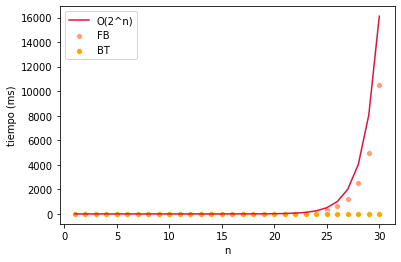

In [29]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados_1[(df_resultados_1["metodo"]=="FB") & (df_resultados_1["dataset"]=="densidad-alta")].copy();
df_complejidad_BT = df_resultados_1[(df_resultados_1["metodo"]=="BT") & (df_resultados_1["dataset"]=="densidad-alta")].copy();
df_complejidad_FB["tiempo_esperado"] = 2.0 ** df_complejidad_FB["n"] * 0.000015; # Exponencial
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', palette = "Paired", color = "crimson");
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', palette = "Paired", color = "lightsalmon");
fig = sns.scatterplot(data=df_complejidad_BT, x='n', y='tiempo', palette = "Paired", color = "orange");
fig.legend(labels=['O(2^n)','FB', 'BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-vs-bt-densidad-alta.svg")
# Comparamos el dataset densidad-alta contra una función exponencial.
#fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo');



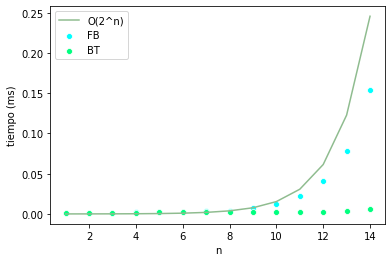

In [30]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados_1[(df_resultados_1["metodo"]=="FB") & (df_resultados_1["dataset"]=="densidad-baja") & (df_resultados_1["n"]<15)].copy();
df_complejidad_BT = df_resultados_1[(df_resultados_1["metodo"]=="BT") & (df_resultados_1["dataset"]=="densidad-baja")&(df_resultados_1["n"]<15)].copy();
df_complejidad_FB["tiempo_esperado"] = 2.0 ** df_complejidad_FB["n"] * 0.000015; # Exponencial
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', palette = "Paired", color = "darkseagreen");
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', palette = "Paired", color = "cyan");
fig = sns.scatterplot(data=df_complejidad_BT, x='n', y='tiempo', palette = "Paired", color = "springgreen");
fig.legend(labels=['O(2^n)','FB', 'BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-vs-bt-densidad baja.svg")
# Comparamos el dataset densidad-alta contra una función exponencial.


Índice de correlación de Pearson: 0.9997667413339629


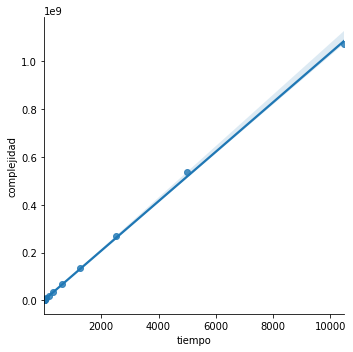

In [31]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_FB = df_resultados_1[(df_resultados_1["metodo"]=="FB") & (df_resultados_1["dataset"]=="densidad-alta")].copy();
df_complejidad_FB["complejidad"] = 2.0 ** df_complejidad_FB["n"];
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

# Experimento 2: Complejidad de Backtracking¶
En este experimento evaluamos el método BT con los datasets mejor-caso-bt. La hipótesis es que va a tener un comportamiento lineal en el mejor caso.

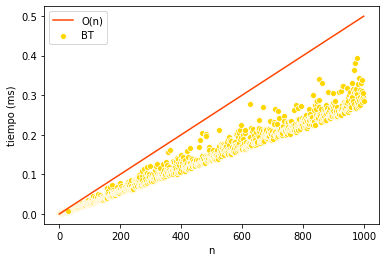

In [39]:
df_BT_mejor_caso = df_resultados_2[(df_resultados_2["metodo"]=="BT") & (df_resultados_2["dataset"] == "mejor-caso-BT")].copy();
df_BT_mejor_caso["tiempo_esperado"] = df_BT_mejor_caso["n"] * 0.0005; # Lineal
fig = sns.scatterplot(data=df_BT_mejor_caso, x='n', y='tiempo', color = "gold");
fig = sns.lineplot(data=df_BT_mejor_caso, x='n', y='tiempo_esperado', color="orangered");
fig.legend(labels=['O(n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.9997667413339629


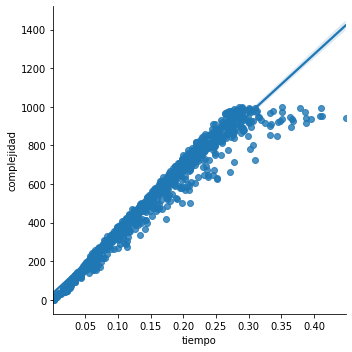

In [55]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_BT = df_resultados_2[(df_resultados_2["dataset"]=="mejor-caso-BT")].copy();
df_complejidad_BT["complejidad"] = df_complejidad_BT["n"];
fig = sns.lmplot(data=df_complejidad_BT, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-mejor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

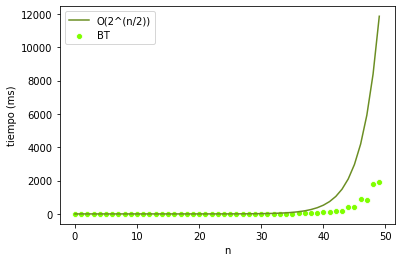

In [60]:
df_BT_mal_caso = df_resultados_2[(df_resultados_2["dataset"] == "mal-caso-BT")].copy();
df_BT_mal_caso["tiempo_esperado"] = 2**(df_BT_mal_caso["n"]/2) * 0.0005; # Lineal
#print(df_BT_mal_caso[df_resultados_2["dataset"] == "mal-caso-BT"])
fig = sns.scatterplot(data=df_BT_mal_caso, x='n', y='tiempo', color = "chartreuse");
fig = sns.lineplot(data=df_BT_mal_caso, x='n', y='tiempo_esperado', color="olivedrab");
fig.legend(labels=['O(2^(n/2))','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-mal-caso.svg");

Índice de correlación de Pearson: 0.9997667413339629


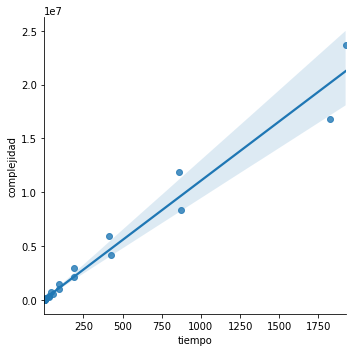

In [59]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_BT = df_resultados_2[(df_resultados_2["dataset"]=="mal-caso-BT")].copy();
df_complejidad_BT["complejidad"] = 2 ** (df_complejidad_BT["n"]/2);
fig = sns.lmplot(data=df_complejidad_BT, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-mal-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

## Experimento 3: Análisis de las podas
Analizar Backtracking con las podas para distintas densidades y peor caso para ambas podas.

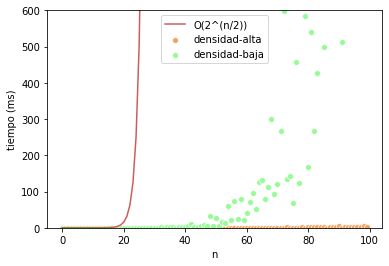

In [55]:
df_BT_densidad_a = df_resultados_3[(df_resultados_3["dataset"] == "densidad-alta")].copy();
df_BT_densidad_b = df_resultados_3[(df_resultados_3["dataset"] == "densidad-baja")].copy();
df_BT_densidad_a["cota_de_complejidad"] = 2.0 ** df_BT_densidad_a["n"] * 0.000015; # Exponencial
fig = sns.lineplot(data=df_BT_densidad_a, x='n', y='cota_de_complejidad', palette = "Paired", color = "indianred");
fig = sns.scatterplot(data=df_BT_densidad_a, x='n', y='tiempo', palette = "Paired", color = "sandybrown");
fig = sns.scatterplot(data=df_BT_densidad_b, x='n', y='tiempo', palette = "Paired", color = "palegreen");
fig.set(ylim=(0, 600)) #sacamos outliers
fig.legend(labels=['O(2^(n/2))',"densidad-alta", "densidad-baja"]);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-densida-alta-vs-baja.svg");

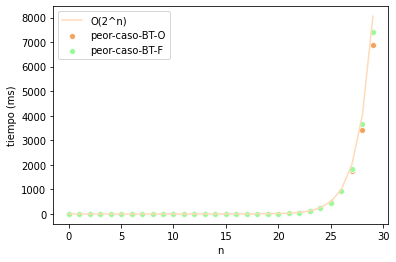

In [57]:
df_BT_densidad_podas_O = df_resultados_3[(df_resultados_3["dataset"] == "peor-caso-BT-O")].copy();
df_BT_densidad_podas_F = df_resultados_3[(df_resultados_3["dataset"] == "peor-caso-BT-F")].copy();
df_BT_densidad_podas_O["tiempo_esperado"] = 2.0 ** df_BT_densidad_podas_O["n"] * 0.000015; # Exponencial
fig = sns.lineplot(data=df_BT_densidad_podas_O, x='n', y='tiempo_esperado', palette = "Paired", color = "peachpuff");
fig = sns.scatterplot(data=df_BT_densidad_podas_F, x='n', y='tiempo', palette = "Paired", color = "sandybrown");
fig = sns.scatterplot(data=df_BT_densidad_podas_O, x='n', y='tiempo', palette = "Paired", color = "palegreen");
fig.set(xlabel='n', ylabel='tiempo (ms)');
fig.legend(labels=['O(2^n)',"peor-caso-BT-O", "peor-caso-BT-F"]);
plt.savefig("graficos/bt-peor-caso-O-vs-F.svg");

# Experimento 4: Complejidad de programación dinámica
    En el siguiente experimenteo se analiza el el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con backtracking.

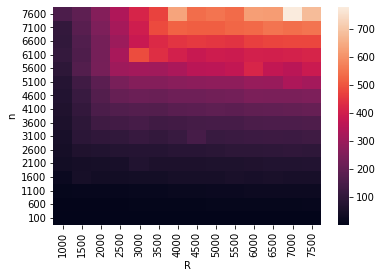

In [123]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados_4[(df_resultados_4["metodo"]=="DP") & (df_resultados_4["dataset"]=="dinamica")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='R', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap.svg");

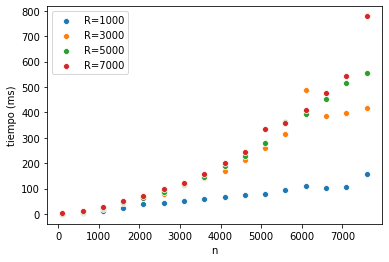

In [133]:
# Se ve la evolución del tiempo de ejecución en función de n, con cortes en distintos R.
df_dinamica = df_resultados_4[(df_resultados_4["metodo"]=="DP") & (df_resultados_4["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==5000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==7000], x='n', y='tiempo');
fig.legend(labels=['R=1000','R=3000','R=5000','R=7000']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");
# El rendimiento es mejor de lo esperado y la diferencia para los casos de R se acentua es para n grandes.

Índice de correlación de Pearson: 0.8942149363348906


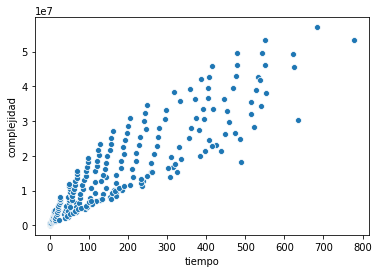

In [132]:
# Se aprecian los tiempos de ejecución de la serie de instancias dinamica vs la complejidad esperada.
df_dinamica = df_resultados_4[(df_resultados_4["metodo"]=="DP") & (df_resultados_4["dataset"]=="dinamica")].copy();
df_dinamica["complejidad"] = df_dinamica["n"] * df_dinamica["R"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));
# Aca se evidencia que la hipotesis falla y la complejidad en el caso promedio no es exactamente O(n*R)
# E incluso en los experimentos anteriores se ve que DP se comporta mejor de lo esperado, esto se debe a que solo se memoizan los subproblemas que se se repiten sino que tambien de utiliza la condicion de que (min_R < 0)
# Esto actua como una poda dentro de los llamados recursivos del algoritmo, es decir no solo se fija si ya calculo la solucion previamente, tambien considera si le interesa calcularlar o recordarla.

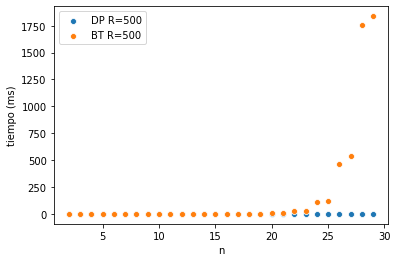

In [125]:
df_dinamica = df_resultados_4_BT[(df_resultados_4_BT["metodo"]=="BT") | (df_resultados_4_BT["metodo"]=="DP")].copy();
fig = sns.scatterplot(data=df_dinamica[(df_dinamica["R"]==500) & (df_dinamica["metodo"]=="DP")], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[(df_dinamica["R"]==500) & (df_dinamica["metodo"]=="BT")], x='n', y='tiempo'); #quitamos outliers
fig.legend(labels=['DP R=500','BT R=500']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

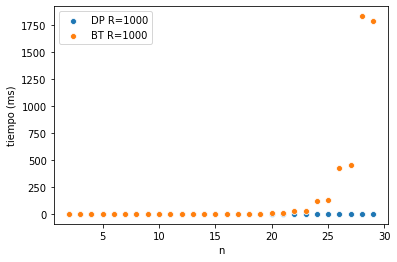

In [126]:
df_dinamica = df_resultados_4_BT[(df_resultados_4_BT["metodo"]=="BT") | (df_resultados_4_BT["metodo"]=="DP")].copy();
fig = sns.scatterplot(data=df_dinamica[(df_dinamica["R"]==1000) & (df_dinamica["metodo"]=="DP")], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[(df_dinamica["R"]==1000) & (df_dinamica["metodo"]=="BT")], x='n', y='tiempo');
fig.legend(labels=['DP R=1000','BT R=1000']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");